In [1]:
import sys
sys.path.append('..')

import numpy as np
import lasagne
import theano
import theano.tensor as T 
import networks

import os
import tiff_helpers
import image_manager
import datetime

%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled)


In [2]:
batch_size = 16

In [3]:
# Create image handler
im_handler = image_manager.image_manager(batch_size=batch_size)

# Advance schedule for the first time 
im_handler.advance_schedule()

In [4]:
# Create network 
network = networks.stn(batch_size=batch_size, save_every=100000)

In [5]:
ind = 0

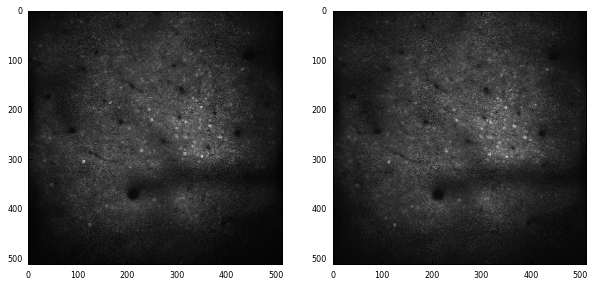

In [6]:
curr_batch_input, curr_batch_ref = im_handler.offer_data()
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.imshow(curr_batch_input[ind, 0, :, :], cmap='gray');
ax = fig.add_subplot(122)
ax.imshow(curr_batch_ref[ind, :, :], cmap='gray');
ind += 1

In [7]:
root_dir = '/media/arimorcos/4TB External/stn_conv_net'
new_log_dir = os.path.join(root_dir, datetime.datetime.now().strftime('%y%m%d_%H%M%S'))
network.set_log_dir(new_log_dir)

In [8]:
curr_batch_input, curr_batch_ref = im_handler.offer_data()
test_input = np.transpose(np.expand_dims(curr_batch_ref, axis=3), axes=(0, 3, 1, 2))
test_input = np.tile(test_input, (1, 2, 1, 1))
network.get_cost(test_input, curr_batch_ref)

array(2.492062762746161e-12, dtype=float32)

In [ ]:
curr_batch_input, curr_batch_ref = im_handler.offer_data()

In [10]:
temp_cost = network.train_adam_helper(curr_batch_input, curr_batch_ref)
temp_cost

[array(0.2066224217414856, dtype=float32),
 array(8.984977722167969, dtype=float32)]

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.imshow(test_out[ind, :, :], cmap='gray');
ax = fig.add_subplot(122)
ax.imshow(curr_batch_ref[ind, :, :], cmap='gray');
ind += 1

In [ ]:
test_out = network.process(curr_batch_input)

In [ ]:
test_out = curr_batch_input[:, 0, :, :]
diff = test_out - curr_batch_ref
(diff**2).mean()

In [ ]:
# Train network 
reset = True
num_batches = 1000
if reset:
    cost = []
    
    # Get directory based on date 
    root_dir = '/media/arimorcos/4TB External/stn_conv_net'
    new_log_dir = os.path.join(root_dir, datetime.datetime.now().strftime('%y%m%d_%H%M%S'))
    network.set_log_dir(new_log_dir)

print_every = 5

for batch in range(num_batches):
    
    # Get data 
    curr_batch_input, curr_batch_ref = im_handler.offer_data()
    
    temp_cost = network.train_adam(curr_batch_input, curr_batch_ref)
    
    cost.append(temp_cost)
    
    if batch % print_every == 0:
        print("Batch: {} | Cost: {:.5f}".format(batch, temp_cost.tolist()))